In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load training and testing data.
train_df = pd.read_csv('kaggle_data/train.csv')
test_df = pd.read_csv('kaggle_data/test.csv')

In [3]:
# Preview the first 5 rows of training data:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Check the dimensions of training dataframe object:
train_df.shape

(42000, 785)

In [5]:
[dtype for dtype in train_df.dtypes if dtype != int]
# Datatypes of all features are confirmed to be integers.

[]

In [6]:
# Assign feature matrix (X) and target vector (y):
features = [col for col in train_df.columns if col != 'label']
X = train_df[features]
y = train_df['label'].values

In [7]:
# Check the dimensions of X:
X.shape

(42000, 784)

In [8]:
# Split data into training set and validation set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
# Check the dimensions of X_train:
X_train.shape

(31500, 784)

In [10]:
# Check the dimensions of y_train:
y_train.shape

(31500,)

In [11]:
# Convert y training and validation data into categorical values:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
# Reshape X training and validation values to match the image dimensions:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
# Preview the first 10 categorical values of y training data:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [14]:
# Check the dimensions of X_train after reshape:
X_train.shape

(31500, 28, 28, 1)

In [15]:
# Instantiate convolutional neural network (CNN) model:
cnn_model = Sequential()

In [16]:
# Set the number of filters, kernel size, activation function, and input dimensions of CNN:
cnn_model.add(Conv2D(filters = 6, kernel_size = 3, activation='relu', input_shape=(28, 28, 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# Add layers to CNN model:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [18]:
# Compile CNN model with categorical crossentropy as loss function, Adam optimization, accuracy evaluation metric:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit CNN model to training and validation data, while saving performance history:
history = cnn_model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=14, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 31500 samples, validate on 10500 samples
Epoch 1/14
31500/31500 [==============================] - 10s 310us/step - loss: 0.8133 - acc: 0.7965 - val_loss: 0.2220 - val_acc: 0.9360
Epoch 2/14
31500/31500 [==============================] - 10s 312us/step - loss: 0.1725 - acc: 0.9489 - val_loss: 0.1429 - val_acc: 0.9595
Epoch 3/14
31500/31500 [==============================] - 10s 308us/step - loss: 0.1162 - acc: 0.9652 - val_loss: 0.1015 - val_acc: 0.9730
Epoch 4/14
31500/31500 [==============================] - 9s 286us/step - loss: 0.0912 - acc: 0.9725 - val_loss: 0.0897 - val_acc: 0.9728
Epoch 5/14
31500/31500 [==============================] - 9s 288us/step - loss: 0.0788 - acc: 0.9753 - val_loss: 0.0807 - val_acc: 0.9767
Epoch 6/14
31500/31500 [==============================] - 9s 287us/step - loss: 0.0673 - acc: 0.9785 - val_loss: 0.0706 - val_acc: 0.9782
Epoch 7/14
31500/31500 [==============================] - 11s 335us/ste

In [20]:
# Examine the CNN model description:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

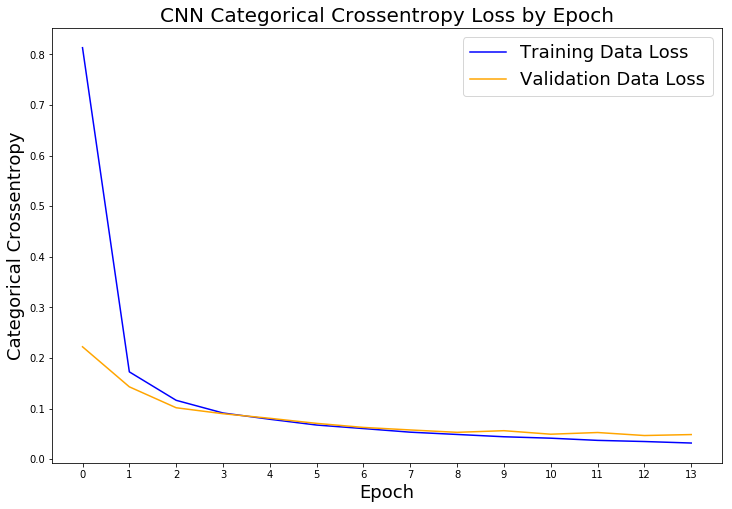

In [21]:
# Gather training data loss and validation data loss over epochs:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set size of plot:
plt.figure(figsize=(12, 8))

# Generate line plot of training and validation data loss along number of epochs:
plt.plot(train_loss, label='Training Data Loss', color='blue')
plt.plot(test_loss, label='Validation Data Loss', color='orange')
plt.title('CNN Categorical Crossentropy Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.legend(fontsize = 18);

# Save the plot as a PNG image file:
plt.savefig('cnn_training_vs_validation_loss.png');

In [22]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=1) # evaluate loss and accuracy score
cnn_labels = cnn_model.metrics_names                      # get the loss and acc metric labels

10500/10500 [==============================] - 2s 158us/step


In [23]:
# Display CNN results:
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')

CNN loss  : 0.048493408877269495
CNN acc   : 0.9857142857142858


In [24]:
# Generate CNN predictions for digit labels according to testing dataframe data:
X_sub = test_df.values.reshape(test_df.shape[0], 28, 28, 1)
X = X_sub / 255
subs = cnn_model.predict(X)
rows = subs.shape[0]
y_subs = [np.argmax(subs[row,:]) for row in range(rows)]
submission = pd.DataFrame({'ImageId' : range(1,rows+1), 'Label' : y_subs})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [25]:
# Save submission data generated by CNN model to CSV file:
# submission.to_csv('kaggle_submissions/convolutional_nn_submission3.csv', index=False)

In [26]:
# Assign feature matrix (X) and target vector (y):
features = [col for col in train_df.columns if col != 'label']
train_df[features] = train_df[features].astype(float)
test_df[features] = test_df[features].astype(float)
X = train_df[features]
y = train_df['label'].values
y = np_utils.to_categorical(y)

# Split data into training set and validation set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
# Scale X training and validation data using StandardScaler:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [28]:
# Sequential neural network model:
model = Sequential()
model.add(Dense(32, input_shape=(28*28,), activation='relu')) # dense input layer with ReLU activation function
model.add(Dense(10, activation='softmax')) # dense output layer with Softmax activation function

In [29]:
# Compile sequential model with categorical crossentropy loss function, Adam optimization, accuracy evaluation:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Fit Sequential model to training and validation data, while saving performance history:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 1s 43us/step - loss: 0.9257 - acc: 0.7193 - val_loss: 0.4445 - val_acc: 0.8777
Epoch 2/10
31500/31500 [==============================] - 1s 33us/step - loss: 0.3527 - acc: 0.9003 - val_loss: 0.3184 - val_acc: 0.9147
Epoch 3/10
31500/31500 [==============================] - 1s 33us/step - loss: 0.2630 - acc: 0.9252 - val_loss: 0.2701 - val_acc: 0.9264
Epoch 4/10
31500/31500 [==============================] - 1s 33us/step - loss: 0.2178 - acc: 0.9397 - val_loss: 0.2425 - val_acc: 0.9352
Epoch 5/10
31500/31500 [==============================] - 1s 36us/step - loss: 0.1888 - acc: 0.9480 - val_loss: 0.2231 - val_acc: 0.9372
Epoch 6/10
31500/31500 [==============================] - 1s 37us/step - loss: 0.1689 - acc: 0.9536 - val_loss: 0.2108 - val_acc: 0.9421
Epoch 7/10
31500/31500 [==============================] - 1s 36us/step - loss: 0.1530 - acc: 0.9583 - val_loss: 0.2004 - val_acc

In [31]:
# Generate Sequential NN predictions for digit labels according to testing dataframe data:
X = ss.transform(test_df)
model.predict(X)

# Create a new dataframe object with digit predictions to submit on Kaggle:
rows = subs.shape[0]
y_subs = [np.argmax(subs[row,:]) for row in range(rows)]
submission = pd.DataFrame({'ImageId' : range(1,rows+1), 'Label' : y_subs})

# Preview first 5 rows of submission dataframe:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [32]:
# Examine model description:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_score = model.evaluate(X_test_sc, y_test, verbose=1) # evaluate loss and accuracy score
model_labels = model.metrics_names                         # get the loss and acc metric labels

10500/10500 [==============================] - 0s 30us/step


In [34]:
# Display Sequential NN model results:
print(f'Sequential NN {model_labels[0]}  : {model_score[0]}')
print(f'Sequential NN {model_labels[1]}   : {model_score[1]}')

Sequential NN loss  : 0.1826433053179866
Sequential NN acc   : 0.948952380952381


In [35]:
# Save submission data generated by Sequential NN model to CSV file:
# submission.to_csv('kaggle_submissions/sequential_nn_submission3.csv', index=False)